### **Airbnb Listings Bangkok**

## About Dataset

#### 
It's a list of places where people can stay through Airbnb when they visit Bangkok. It gives details about each stay, the type of room, the price, how many minimum nights guests can stay, and how many reviews it has. This dataset helps Airbnb from Bangkok representative to improve their policy better. 

## The Stakeholder

#### The C-level executive of Airbnb's Bangkok representative

## Problems and Goals

####
- Problems:
1. Guests did not review the unit after they checked out
2. Insufficient reviews make it difficult for hosts to improve the quality of their units
3. Bad or no review from the guests might lead to Airbnb's reputation and a lack of trust among potential guests

- Goals:
1. Help hosts to identify for enhancing the quality of their listings
2. Policy to oblige the guest to review 
3. Aim to continually improve the experience for both hosts and guests on the platform.
 
- Insights: 
1. Top 5 Listings by Neighbourhood
2. The Most Frequent Room Types in Vadhana
3. Top 5 Neighbourhoods with the Lowest Total Reviews Received. Output tersebut  akan dijadikan acuan pada insights selanjutnya
4. Top 5 Neighbourhoods with Lowest Review Received
5. Top 5 Host with the Lowest Total Reviews Received Khlong Tei
6. Top 5 Host with Lowest Review Received in Khlong Tei

### **a. Import Library & Data**

In [3]:
#Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import folium

import warnings
warnings.filterwarnings("ignore")

In [4]:
#Import Dataset
df = pd.read_csv('Airbnb Listings Bangkok.csv')
df

,Unnamed: 0,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0
1,1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,NaN,NaN,2,358,0
2,2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,NaN,NaN,1,365,0
3,3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01,0.03,1,323,1
4,4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,NaN,NaN,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,NaN,NaN,1,362,0
15850,15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,NaN,NaN,14,365,0
15851,15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,NaN,NaN,14,365,0
15852,15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,NaN,NaN,14,365,0


### **b. Data Understanding**

#### Data Column & Its Description

| Column Name                     | Description                                                                 |
|---------------------------------|-----------------------------------------------------------------------------|
| id                              | Unique identifier for the listing                                        |
| name                            | Name or title of the listing                                             |
| host_id                         | Unique identifier for the host/user                                      |
| host_name                       | First name(s) of the host                                                |
| neighbourhood                    | Neighbourhood determined by geographic coordinates                        |
| latitude                        | Geographic latitude coordinate of the listing                            |
| longitude                       | Geographic longitude coordinate of the listing                           |
| room_type                       | Type of room or accommodation offered                                    |
| price                           | Daily price in local currency                                           |
| minimum_nights                  | Minimum number of nights required for booking                             |
| number_of_reviews               | Total number of reviews the listing has received                          |
| last_review                     | Date of the most recent review                                           |
| calculated_host_listings_count  | Number of listings owned by the host in the same city/region             |
| availability_365                | Availability of the listing on each of the next 365 days                 |
| number_of_reviews_ltm           | Number of reviews the listing has received in the last 12 months        |


In [5]:
# To get info about Dtype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15854 entries, 0 to 15853
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      15854 non-null  int64  
 1   id                              15854 non-null  int64  
 2   name                            15846 non-null  object 
 3   host_id                         15854 non-null  int64  
 4   host_name                       15853 non-null  object 
 5   neighbourhood                   15854 non-null  object 
 6   latitude                        15854 non-null  float64
 7   longitude                       15854 non-null  float64
 8   room_type                       15854 non-null  object 
 9   price                           15854 non-null  int64  
 10  minimum_nights                  15854 non-null  int64  
 11  number_of_reviews               15854 non-null  int64  
 12  last_review                     

In [6]:
# To see the Data Type, N Unique, and its sample
list_df = []
for col in df.columns :
    list_df.append([
        col,
        df[col].dtype,
        df[col].nunique(),
        list(df[col].drop_duplicates().sample(2).values)
    ])

pd.DataFrame(list_df, columns = ['Columns', 'Data Type', 'N Unique', 'Unique Sample'])

,Columns,Data Type,N Unique,Unique Sample
0,Unnamed: 0,int64,15854,"[9661, 6291]"
1,id,int64,15854,"[8703776, 17980313]"
2,name,object,14794,[Cozy 1BR rooftop (BTS Ploenchit) heart of ban...
3,host_id,int64,6659,"[54574474, 23758849]"
4,host_name,object,5312,"[ภูริช, The Shade House]"
5,neighbourhood,object,50,"[Chatu Chak, Sathon]"
6,latitude,float64,9606,"[13.73591, 13.71918]"
7,longitude,float64,10224,"[100.48399909682009, 100.49494]"
8,room_type,object,4,"[Hotel room, Entire home/apt]"
9,price,int64,3040,"[4900, 1001]"


In [7]:
#Identify dtype from each column

df.dtypes

Unnamed: 0                          int64
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
dtype: object

In [8]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

# Check the dtype after conversion
print(df['last_review'].dtype)

datetime64[ns]


In [9]:
#Identify dtype from each column

df.dtypes

Unnamed: 0                                 int64
id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
dtype: object

#### Assumption from range reviews_per_month:

Range berada di 0.01 sampai 19.13. Oleh karena itu, analyst berasumsi range review setiap bulan yang diterima adalah 0.00 hingga 20.00

### **c. Missing Values**

In [10]:
#To know missing values from the dataset

df.isna().sum()

Unnamed: 0                           0
id                                   0
name                                 8
host_id                              0
host_name                            1
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       5790
reviews_per_month                 5790
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
dtype: int64

kasih penjelasan singkat apa aja yang missing valuesnya

In [11]:
# Drop Unnamed: 0

df.drop(['Unnamed: 0'], axis = 1,inplace= True)

In [12]:
# Fill name with No Name, host_name with Unknown, last_review with 0,reviews_per_month with 0)

df['name'].fillna('No Name', inplace= True)
df['host_name'].fillna('Unknown', inplace= True)
df['last_review'].fillna('0-0-0000', inplace= True)
df['reviews_per_month'].fillna('0', inplace= True)

In [13]:
#To make sure 0 missing values after 
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

In [14]:
#To check if the missing values has been filled
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0-0-0000,0,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0-0-0000,0,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0-0-0000,0,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0-0-0000,0,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0-0-0000,0,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0-0-0000,0,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0-0-0000,0,14,365,0


In [15]:
# Check for duplicate rows based on all columns

df[df.duplicated()]

#Result: no duplicated values


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm


In [16]:
df

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.759830,100.541340,Entire home/apt,1905,3,65,2020-01-06 00:00:00,0.5,2,353,0
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.668180,100.616740,Private room,1316,1,0,0-0-0000,0,2,358,0
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.752320,100.624020,Private room,800,60,0,0-0-0000,0,1,365,0
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.788230,100.572560,Private room,1286,7,2,2022-04-01 00:00:00,0.03,1,323,1
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.768720,100.633380,Private room,1905,1,0,0-0-0000,0,3,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15849,790465040741092826,素坤逸核心两房公寓42楼，靠近BTSon nut/无边天际泳池观赏曼谷夜景/出门当地美食街,94899359,Renee,Pra Wet,13.715132,100.653458,Private room,2298,28,0,0-0-0000,0,1,362,0
15850,790474503157243541,Euro LuxuryHotel PratunamMKt TripleBdNrShoping...,491526222,Phakhamon,Ratchathewi,13.753052,100.538738,Private room,1429,1,0,0-0-0000,0,14,365,0
15851,790475335086864240,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.753169,100.538700,Private room,1214,1,0,0-0-0000,0,14,365,0
15852,790475546213717328,Euro LuxuryHotel PratunamMKt TwinBedNrShopingArea,491526222,Phakhamon,Ratchathewi,13.754789,100.538757,Private room,1214,1,0,0-0-0000,0,14,365,0


####
Awalnya terdapat 15854 rows × **17 columns**. Setelah data cleansing, dataset menjadi 15854 rows × **16 columns**

Data cleansing dilakukan pada column
- name
- host_name
- last_review
- reviews_per_month 

### **d. Outliers**

Identify outlier from every nummerical columns

<Axes: xlabel='price', ylabel='Density'>

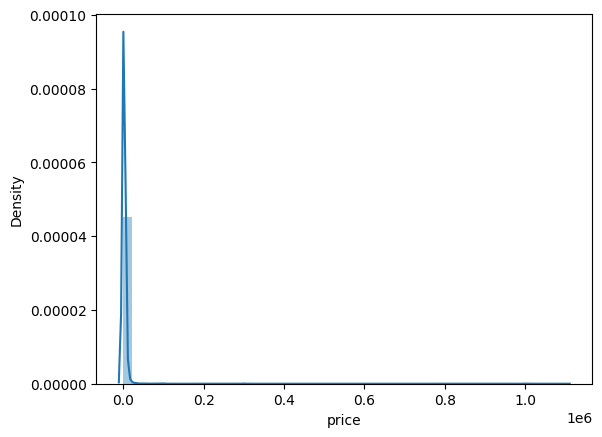

In [17]:
# Distplot from Price

sns.distplot(df['price'])

<Axes: xlabel='minimum_nights', ylabel='Density'>

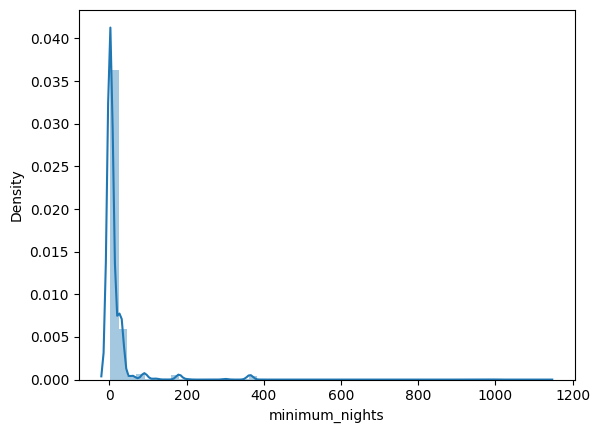

In [18]:
# Distplot from Minimum Nights

sns.distplot(df['minimum_nights'])

<Axes: xlabel='number_of_reviews', ylabel='Density'>

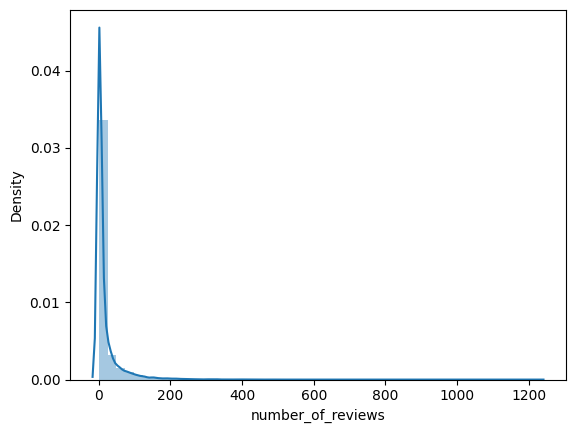

In [19]:
# Distplot from Number of Reviews

sns.distplot(df['number_of_reviews'])

<Axes: xlabel='calculated_host_listings_count', ylabel='Density'>

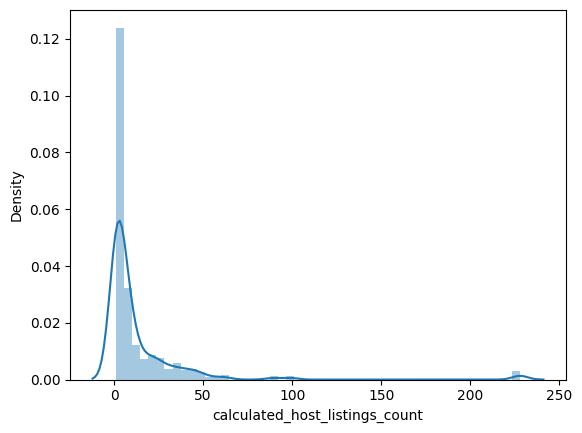

In [20]:
# Distplot from Calculated Host Listings Count

sns.distplot(df['calculated_host_listings_count'])

<Axes: xlabel='availability_365', ylabel='Density'>

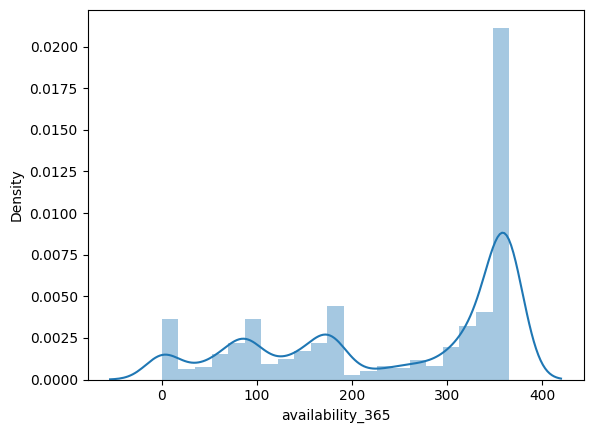

In [21]:
# Distplot from Availability in a Year

sns.distplot(df['availability_365'])

#bilang aja ga normal

<Axes: xlabel='number_of_reviews_ltm', ylabel='Density'>

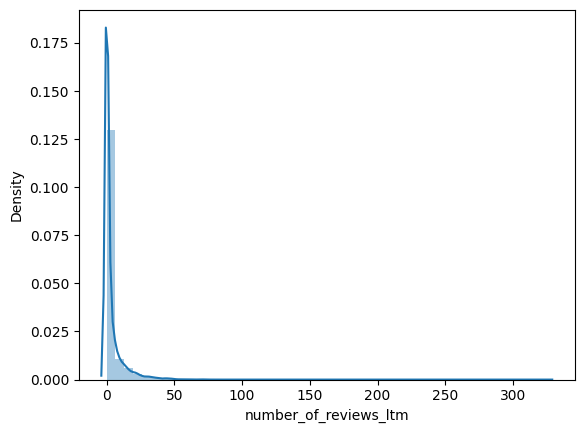

In [22]:
sns.distplot(df['number_of_reviews_ltm'])

####
The outliers of Airbnb Listings in Bangkok are mostly right-skewed. It means that most of the data (price, minimum nights, number of reviews, calculated host listings count, availability in 365 days, number_of_reviews_ltm) are on the left side with lower values. On the other hand, few of the data are on the right side with higher value. Mean is greater than median.

### **e. Data Visualization**


In [23]:
#To know unique from each column

df.nunique()

id                                15854
name                              14795
host_id                            6659
host_name                          5313
neighbourhood                        50
latitude                           9606
longitude                         10224
room_type                             4
price                              3040
minimum_nights                       86
number_of_reviews                   298
last_review                        1670
reviews_per_month                   514
calculated_host_listings_count       50
availability_365                    366
number_of_reviews_ltm                85
dtype: int64

#### 1. Top 5 Listings by Neighbourhood

In [24]:
#To see total rows in column 'neighbourhood'
total_rows= len(df['neighbourhood'].index)
print("Total rows of column 'neighbourhood':", total_rows)

#To see total unique value in column 'neighbourhood'
total_uv= df['neighbourhood'].nunique()   
print("Unique value of column 'neighbourhood: ",total_uv )    

Total rows of column 'neighbourhood': 15854
Unique value of column 'neighbourhood:  50


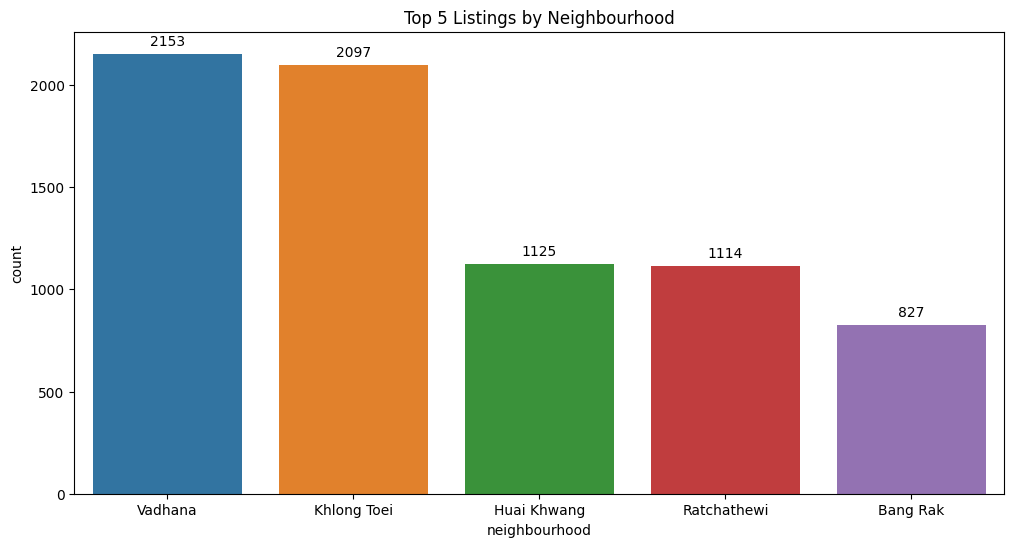

In [25]:
# Countplot size
plt.figure(figsize=(12, 6))

# Code to create countplot
top5_neigbourhood = sns.countplot(x='neighbourhood', data=df, order=df['neighbourhood'].value_counts().index[:5])

# Title
plt.title('Top 5 Listings by Neighbourhood')

# To make X-Axis easier to read
plt.xticks(rotation=0)

# Display the number
for p in top5_neigbourhood.patches:
    top5_neigbourhood.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 9), textcoords='offset points')

# Show the plot
plt.show()


Berdasarkan code di atas, hal tersebut menunjukkan bahwa 
1. Total rows memiliki total yang sesuai dengan column 'id'
2. Vadhana merupakan district yang memiliki listings terbanyak pertama
3. Khlong Tei merupakan district yang memiliki listings terbanyak kedua

Oleh karena itu, Vadhana akan menjadi pusat pada analisis ini

#### 2. The Most Frequent Room Type in Vadhana

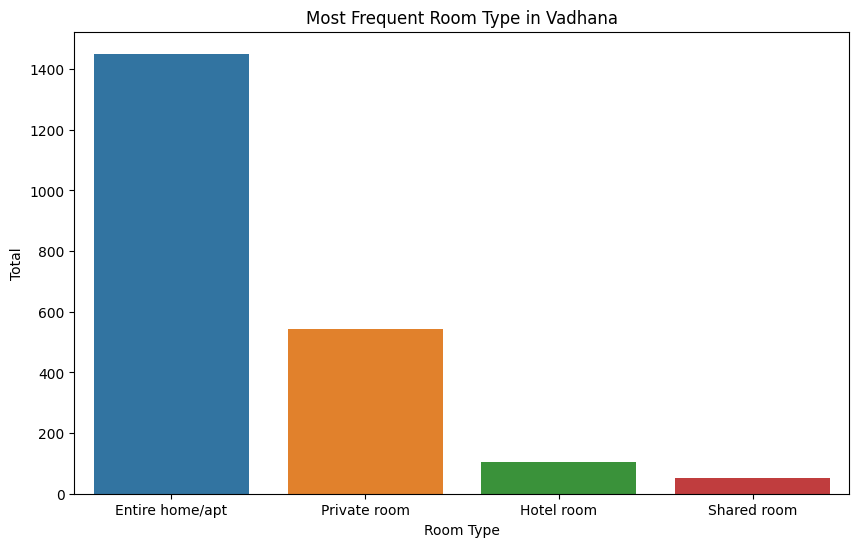

In [26]:
# Filter data for Vadhana neighbourhood
vadhana_data = df[df['neighbourhood'] == 'Vadhana']

# Count the occurrences of each room type
room_type_counts = vadhana_data['room_type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)

# X-Axis Label
plt.xlabel('Room Type')

# Y-Axis Label
plt.ylabel('Total')

#Title
plt.title('Most Frequent Room Type in Vadhana')

# To make X-Axis easier to read
plt.xticks(rotation=0)

# Show the plot
plt.show()


Entire home or apartment is the most frequent room type in Vadhana

#### 3. Top 5 Neighbourhoods with The Lowest Total Reviews Received

In [27]:
min_reviews_ltm = df['number_of_reviews_ltm'].min()
print("The lowest number of reviews received in the last 12 months:", min_reviews_ltm)

The lowest number of reviews received in the last 12 months: 0


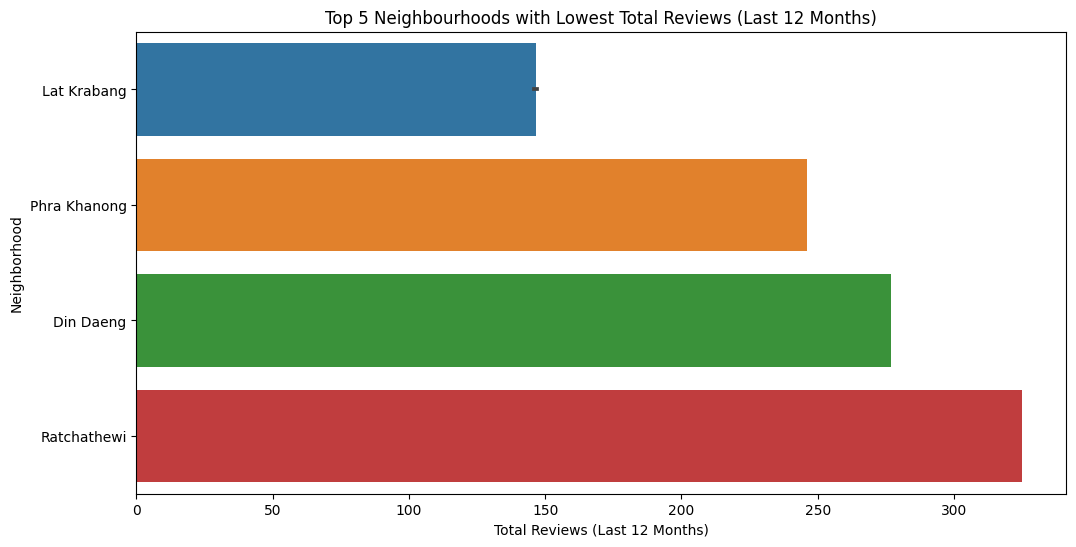

In [28]:
# Sort the DataFrame by total reviews in the last 12 months in ascending order
bottom_5_neighbourhoods = df.sort_values(by='number_of_reviews_ltm').tail(5)

# Create a bar plot for the bottom 5 neighbourhoods
plt.figure(figsize=(12, 6))

#Code to create barplot
sns.barplot(x='number_of_reviews_ltm', y='neighbourhood', data=bottom_5_neighbourhoods)

#Title
plt.title('Top 5 Neighbourhoods with Lowest Total Reviews (Last 12 Months)')

#X-Axis title
plt.xlabel('Total Reviews (Last 12 Months)')

#Y-Axis title
plt.ylabel('Neighborhood')

#Show the bar plot
plt.show()

Berdasarkan data di atas, Lat Krabang mendapatkan total review paling sedikit selama 12 bulan terakhir.

#### 4. Top 5 Neighbourhoods with Lowest Review Received

In [33]:
# Convert 'reviews_per_month' to numeric, replace non-numeric values with NaN
df['reviews_per_month'] = pd.to_numeric(df['reviews_per_month'])

# Sort the DataFrame by 'reviews_per_month' column in ascending order
df_sorted = df.sort_values(by='reviews_per_month', ascending=True)

# Get the minimum and maximum values of 'reviews_per_month'
min_reviews = df_sorted['reviews_per_month'].min()
max_reviews = df_sorted['reviews_per_month'].max()

# Print the range
print(f"Range of reviews_per_month: {min_reviews} to {max_reviews}")


Range of reviews_per_month: 0.0 to 19.13


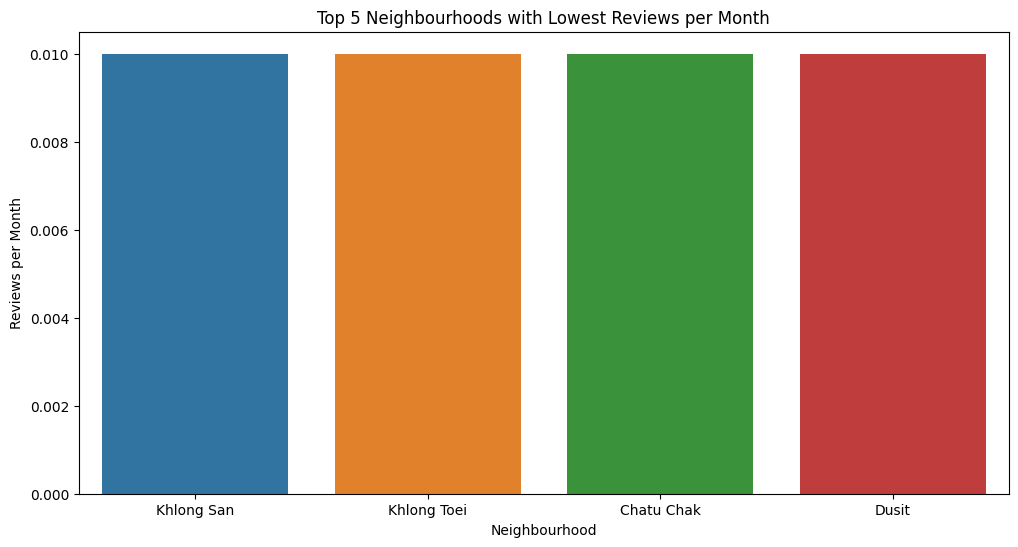

In [ ]:
# Sort the DataFrame by reviews_per_month in ascending order
bottom_5_neighbourhoods = df.sort_values(by='reviews_per_month').head(5)

# Create a bar plot for the bottom 5 neighbourhoods
plt.figure(figsize=(12, 6))

# Code to create barplot
sns.barplot(x='neighbourhood', y='reviews_per_month', data=bottom_5_neighbourhoods)

# Title
plt.title('Top 5 Neighbourhoods with Lowest Reviews per Month')

# X-Axis title
plt.xlabel('Neighbourhood')

# Y-Axis title
plt.ylabel('Reviews per Month')

# Show the bar plot
plt.show()


Khlong San, Khlong Toei, Chatu Chak, Dusit merupakan distrik yang menerima review terendah

#### 5. Top 5 Host with the Lowest Total Reviews Received Khlong Tei

In [35]:
# Filter the DataFrame for 'Khlong Tei' neighborhood
khlong_tei_data = df[df['neighbourhood'] == 'Khlong Tei']

# Sort the data by 'number_of_reviews_ltm' in ascending order
sorted_data = khlong_tei_data.sort_values(by='number_of_reviews_ltm', ascending=True).head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='number_of_reviews_ltm', y='host_id', data=sorted_data, palette='viridis')

# Set the title
plt.title('Top 5 Hosts with the Lowest Total Reviews Received in Khlong Tei')

# Set the labels for x and y axes
plt.xlabel('Total Reviews (Last 12 Months)')
plt.ylabel('Host ID')

# Show the plot
plt.show()

ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

In [43]:
# Check if the DataFrame is empty
if df_sorted.empty:
    print("The DataFrame is empty. No minimum value.")
else:
    # Get the minimum and maximum values of 'reviews_per_month'
    min_reviews = df_sorted['reviews_per_month'].min()
    max_reviews = df_sorted['reviews_per_month'].max()

    # Print the range
    print(f"Range of reviews_per_month: {min_reviews} to {max_reviews}")

Range of reviews_per_month: 0.0 to 19.13


#### 6. Top 5 Host with Lowest Review Received in Khlong Tei

In [39]:
# Filter the DataFrame for 'Khlong Tei' neighborhood
khlong_tei_data = df[df['neighbourhood'] == 'Khlong Tei']

# Sort the data by 'reviews_per_month' in ascending order
sorted_data = khlong_tei_data.sort_values(by='reviews_per_month').head(5)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='reviews_per_month', y='host_id', data=sorted_data, palette='viridis')

# Set the title
plt.title('Top 5 Hosts with the Lowest Review Received in Khlong Tei')

# Set the labels for x and y axes
plt.xlabel('Reviews Per Month')
plt.ylabel('Host Name')

# Show the plot
plt.show()


ValueError: min() arg is an empty sequence

<Figure size 1200x600 with 0 Axes>

Khlong Thei memiliki listings terbanyak kedua serta distrik yang menerima review terendah. Oleh karena itu, Khlong Thei akan menjadi pusat pada analisis ini. Data visualisasi lebih lanjut mengenai Khlong Tei akan dijelaskan pada story Tableau.

Recommendations:
1. Setelah guests memberi review, Airbnb dapat memberikan tambahan poin sehingga mendapatkan potongan harga untuk stay berikutnya
2. Airbnb memberi sebuah pesan reminder melalui e-mail aplikasi dari guest 
3. Saat guest hendak memberi review, guest diberi sebuah penjelasan bahwa review harus ditulis secara jujur dan host tidak mampu mengganggu gugat atas review tersebut
4. Airbnb menghubungi host yang memiliki unit dengan bad atau no review. Hal tersebut dilakukan agar host meningkatkan kualitas unitnya. Apabila tidak dilaksanakan dalam waktu tertentu, maka Airbnb memiliki otoritas untuk memutuskan hubungan dengan host. Pihak Airbnb juga harus mengawasi setiap progress dari host terhadap unitnya.
